<a href="https://colab.research.google.com/github/Luckysolex/Data-Science-Projects/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Regression**

Random Forest Regression is like a forest of decision trees.
Instead of relying on just one tree, it builds many trees and combines their predictions to be more accurate and stable.

**How it works:**

1.  **Many Trees**: Instead of one tree, a Random Forest builds many individual decision trees.
2.  **Randomness**: Each tree is built using a random subset of the data (bootstrapping) and considers only a random subset of features for splitting at each node. This randomness helps to reduce overfitting.
3.  **Voting/Averaging**: For regression, the final prediction is the average of the predictions from all the individual trees. This averaging helps to smooth out individual tree errors and provides a more robust prediction.

### **Why Random Forest is often better than a single Decision Tree:**

*   **Reduced Overfitting**: Individual decision trees can easily overfit the training data. Random Forest, by combining many trees trained on different subsets of data and features, tends to generalize better to unseen data.
*   **Improved Accuracy**: The averaging process often leads to more accurate predictions than any single decision tree.
*   **Robustness**: It's less sensitive to noise or outliers in the data because multiple trees are involved.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Define the feature and target
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = df['median_house_value']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,     # Number of decision trees in the forest
    max_depth=10,         # Limit depth of each tree
    min_samples_leaf=10,  # Minimun samples required at a leaf node
    min_samples_split=20, # Minimum samples required to split a node
    random_state=42,
    n_jobs=-1             # Use all available CPU cores
    )
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      n_jobs=-1, random_state=42)

### **Hyperparameters Explanation for Random Forest Regressor:**

*   **`n_estimators=100`**
    *   This is the number of individual decision trees the Random Forest will build. More trees generally lead to more stable and accurate predictions, but also increase computation time.
    *   **Analogy**: "Let's get 100 different experts (trees) to each give their opinion, and then we'll average their answers."

*   **`max_depth=10`**
    *   Similar to the Decision Tree, this limits how deep each individual tree in the forest can grow. It prevents any single tree from becoming too complex and overfitting.
    *   **Analogy**: "Each expert (tree) should only ask up to 10 questions before giving their prediction."

*   **`min_samples_split=20`**
    *   A node in any individual tree must have at least 20 data points to be considered for splitting. This helps prevent trees from creating branches for very small, potentially noisy, groups.
    *   **Analogy**: "An expert (tree) should only split a group if it contains at least 20 houses. Don't bother splitting tiny groups."

*   **`min_samples_leaf=10`**
    *   Each leaf node (the final prediction point) in any individual tree must contain at least 10 samples. This ensures that predictions are not based on very few data points, which can be unstable.
    *   **Analogy**: "Each final prediction given by an expert (tree) must be based on at least 10 houses."

*   **`random_state=42`**
    *   This ensures that the random processes (like selecting data subsets and features) are reproducible. If you run the code again with the same `random_state`, you'll get the same results.
    *   **Analogy**: "Let's make sure that when we pick random data and features, we do it the exact same way every time we run this experiment."

*   **`n_jobs=-1`**
    *   This tells the model to use all available CPU cores to train the trees in parallel, which can significantly speed up the training process for larger datasets and many trees.
    *   **Analogy**: "Let's use all our available helpers to build these trees at the same time to finish faster!"

In [ ]:
# Make prediction for the training dataset
y_train_pred = model.predict(X_train)
print("Random Forest Predictions (training dataset):")
print(y_train_pred)

Random Forest Predictions (training dataset):
[216534.96260459  97163.19512959 221245.70442977 ... 322936.29682262
 260661.62377716 278094.51392458]


In [ ]:
# Make prediction for the test dataset
y_test_pred = model.predict(X_test)
print("Random Forest Predictions (test dataset):")
print(y_test_pred)

Random Forest Predictions (test dataset):
[217587.68915278 152771.41918261 202025.04936587 ...  85022.42003558
 119186.04550058 122577.02990175]


## Evaluation Metrics

In [ ]:
rf_train_r2 = r2_score(y_train, y_train_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)

print("Training R^2 score:", round(rf_train_r2, 4))
print("Test R^2 score:", round(rf_test_r2, 4))

Training R^2 score: 0.8308
Test R^2 score: 0.7791


In [ ]:
rf_train_mae = mean_absolute_error(y_train, y_train_pred)
rf_test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training MAE score:", round(rf_train_mae, 4))
print("Test MAE score:", round(rf_test_mae, 4))

Training MAE score: 31872.572
Test MAE score: 36640.0696


In [ ]:
average_house_price = df['median_house_value'].mean()
MAE_percentage_of_avg = (rf_test_mae / average_house_price) * 100

print("MAE percentage of average house price:", round(MAE_percentage_of_avg, 2), "%")

MAE percentage of average house price: 17.71 %


In [ ]:
# Feature importance for random forest
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)
display(rf_feature_importance)

,Feature,Importance
7,median_income,0.601485
0,longitude,0.161497
1,latitude,0.146397
2,housing_median_age,0.054576
5,population,0.012380
4,total_bedrooms,0.011139
3,total_rooms,0.006672
6,households,0.005855


### **Random Forest Feature Importance**

Just like with a single Decision Tree, Random Forest also provides a measure of feature importance. This tells us which input features were most influential in making the predictions across all the trees in the forest.

*   **How it works**: For each decision tree in the forest, it records how much each feature contributed to reducing impurity (or error) when that feature was used for a split. These contributions are then averaged across all trees to get a robust importance score for each feature.


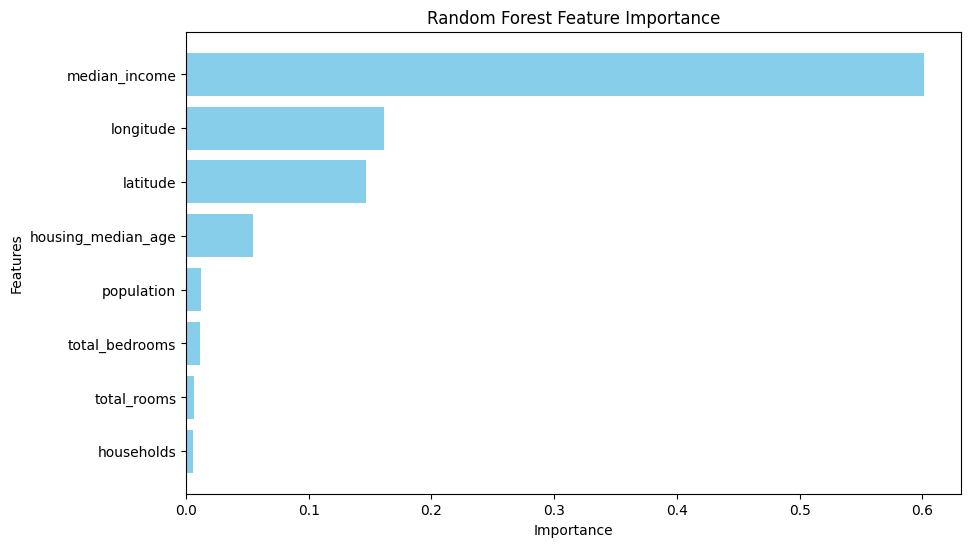

In [ ]:
sorted_importance_rf = rf_feature_importance.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(sorted_importance_rf['Feature'], sorted_importance_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
#plt.gca().invert_yaxis()
plt.show()

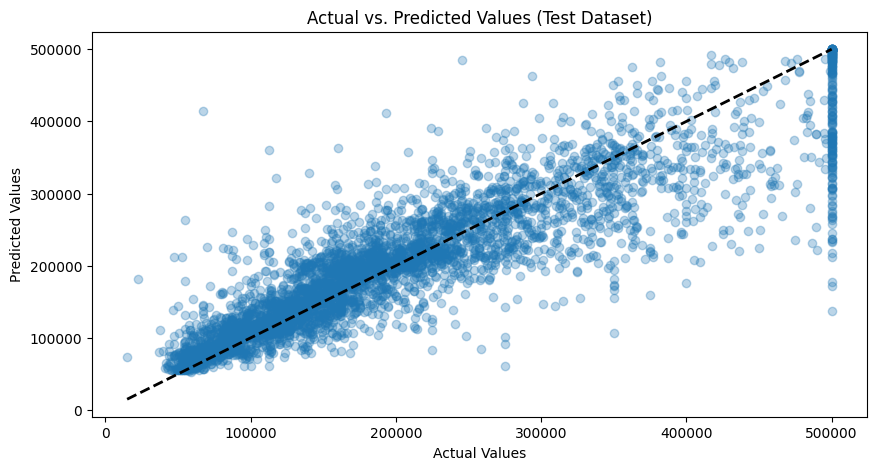

In [ ]:
# Plot actual vs predicted values for the test dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Dataset)')
plt.show()

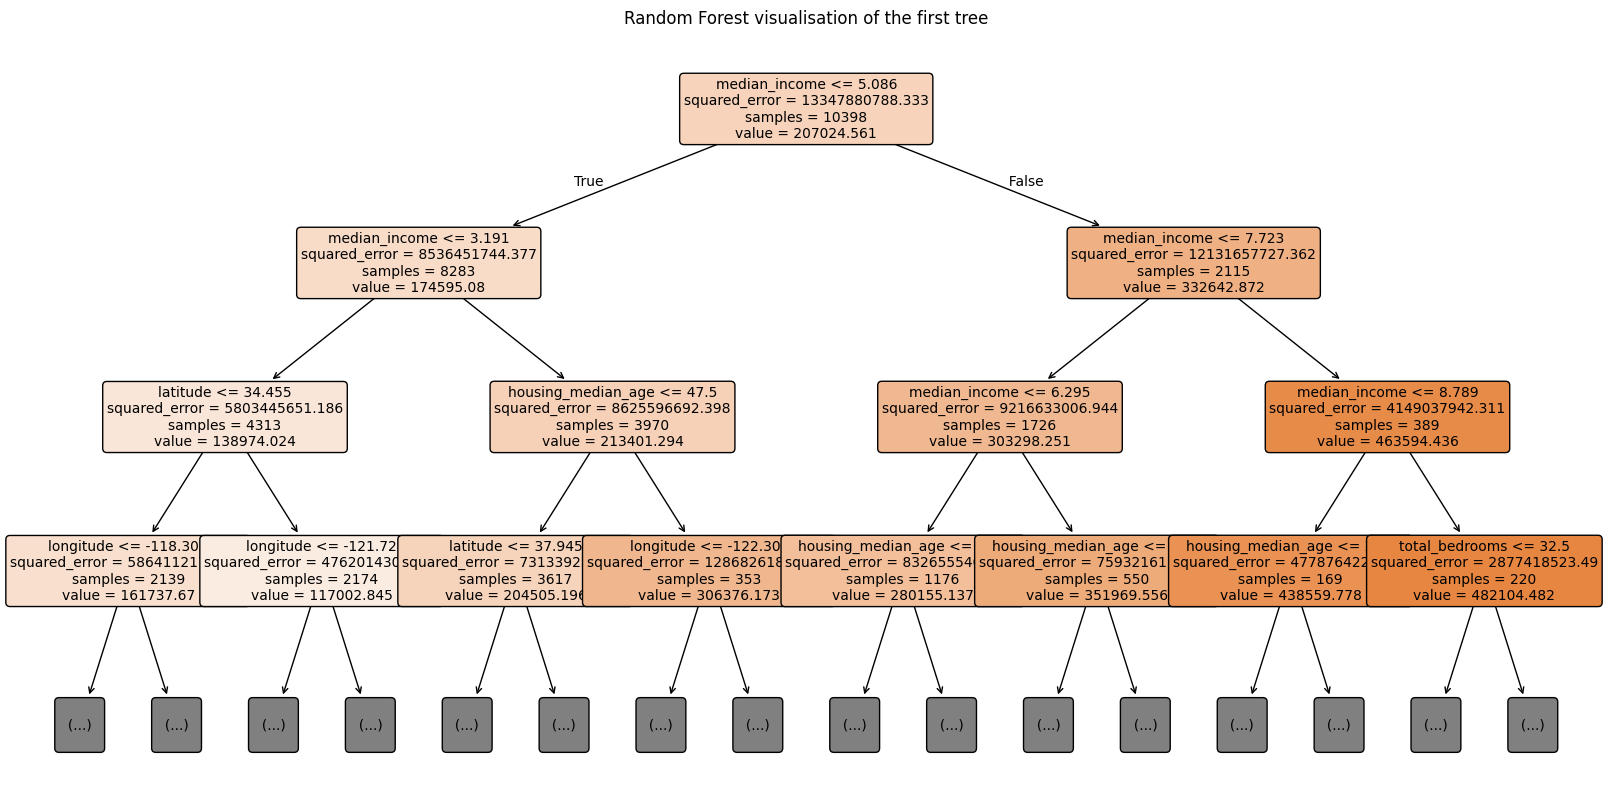

In [ ]:
from sklearn import tree

plt.figure(figsize=(20, 10))
features = X.columns

# Access the first estimator (tree) from the random forest
# You can change the index ([0], [1], [2], etc) to view different trees

tree.plot_tree(model.estimators_[5], feature_names=features, max_depth=3, filled=True, rounded=True, fontsize=10)
plt.title("Random Forest visualisation of the first tree")
plt.show()